# Group Project

In [1]:
library(tidyverse) 
library(GGally)
library(rsample)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖

Understanding the factors that drive player engagement is critical to improving user satisfaction and retention in the gaming industry. The amount of time players spend on a game is an important metric of engagement, and it is frequently influenced by attributes such as age, gaming experience, and other behavioural aspects. 

In the case of this report, a research group is interested in recruiting potential participants who would contribute large amounts of data to machine learning, what time windows have the largest number of players, and whether or not a player will continue contributing data based on past participation. Our question focuses on the types of players contributing the most data to the study in order to make it easier for the research group to target recruitment efforts to individuals who fit those categories to further gain more data as training for AI models. 

This report looks into the relationship between playtime and player characteristics, focusing on age and experience level. We hope to uncover patterns and identify which factors have the most influence on playtime by evaluating a dataset that includes total hours played, player age, and gaming experience level.

The dataset comprises 111 observations, each recording the total play hours alongside the player’s age and experience level. The analysis employs a two-step approach: first, exploratory data analysis (EDA) is conducted to identify trends and patterns in the data; second, regression modeling is utilized to quantify the relationships between variables and predict playtime. This methodology provides a comprehensive understanding of how player attributes relate to engagement. (word count:- 256)

In [18]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
download.file(players_url, "players.csv")
players_data <- read_csv("players.csv")
head(players_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


This dataset consists of information on 196 players who have interacted with a specific video game server. The data includes the following variables:

1) experience: Indicates the experience level of each player, with values such as "Pro," "Veteran," "Regular," "Amateur," and "Beginner."
2) subscribe: A boolean variable indicating whether the player has subscribed (TRUE) or not (FALSE).
3) hashedEmail: An anonymized hash of each player's email address, used as a unique identifier.
4) played_hours: The total hours each player has spent on the server.
5) name: The player’s name, recorded as a string.
6) gender: The player’s gender, with values such as "Male," "Female," and "Non-binary."
7) age: The age of each player, ranging from 8 to 99 years..
8) individualId: This column is entirely missing (NA), suggesting it may not contain relevant information or was not collected.
9) organizationName: This column is also entirely missing (NA), indicating no data was collected for this variable.
word count :- 155

In [35]:
players_data_edit <- players_data |> 
    select(experience, played_hours, gender, age) 

players_data_edits <- players_data_edit |>
    filter(played_hours > 0) 
    
players_data_edits

players_log_scaled <- players_data_edits |>
    mutate(log_scaled_hours = log(played_hours))

players_numeric <- mutate(players_data_edits, experience_num_unordered = as.numeric(as.factor(experience))) |>
    mutate(experience_num = case_when(
        experience_num_unordered == 1 ~ 1,
        experience_num_unordered == 2 ~ 0,
        experience_num_unordered == 3 ~ 3,
        experience_num_unordered == 4 ~ 2,
        experience_num_unordered == 5 ~ 4)) |>
    select(played_hours, age, experience_num)

players_numeric

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Amateur,0.7,Female,21
Regular,0.1,Male,21
Amateur,0.1,Male,17
Veteran,1.6,Female,23
Beginner,1.5,Female,25
Amateur,0.2,Male,22
Amateur,48.4,Female,17


played_hours,age,experience_num
<dbl>,<dbl>,<dbl>
30.3,9,3
3.8,17,4
0.7,21,1
0.1,21,2
0.1,17,1
1.6,23,4
1.5,25,0
0.2,22,1
48.4,17,1


Original wrangling after downloading the data frames involves selection and filtering of variables to use as either response or predictors variables, as is obligatory when using regression. 

Regression uses the kknn nearest neighbors package, meaning that it takes similar values into consideration when predicting new data points. As regression cannot be used with categorical variables, it is necessary to convert all factors which we are using to numerical values. Our response variable using this method would naturally be the number of played hours, as predicting which players would have the highest number of hours would give us the categories of players that give the most data, making it easier to target said players in recruitment efforts. Out of the variables, we decided upon using the predictor variables age and experience, due to the issues of using gender as a predictor variable. Namely that there are values that we would not be able to categorize very easily or use to target specific players(individuals who chose not to disclose their gender for instance). Regression, as stated above, uses the nearest neighbors algorithm for predicting future values, which gives us difficulty in converting specific variables from categorical values that should be given equal value to each other, such as gender. This causes potential issues, as giving different numerical values for gender identities would give values for data points more correlation with others and predict those values together more often, which would cause issues in correctly predicting future data points. As such, it is also necessary to convert experience into numerical values as it is originally a categorical variable with a total of five different values: beginner, amateur, regular, veteran and pro. Due to regression requiring numerical values, these were each assigned a value from zero to four, with beginner starting at zero and pro ending at four, with more experienced players being closer together, while less experienced players would likewise have their data more closely assigned together. This would prevent issues with the predictions being more inaccurate due to these values not having equal distance, which would be an issue with data points having equal values but not equal distance from each other in the case of gender. 

First impressions of the data show that wrangling is necessary, as parts of the data frame contain players with a number of hours at zero, so naturally it is a requirement to filter those out as they would give data that would give us inaccurate predictions, as these players have not contributed any data to the study but are still being considered as data points. It is also necessary to scale the data, as a large number of the data points seem to be very close to zero. Scaling is a necessity for any machine learning as it normalizes the data, as otherwise some features will hold more weight than others when predicting future data points


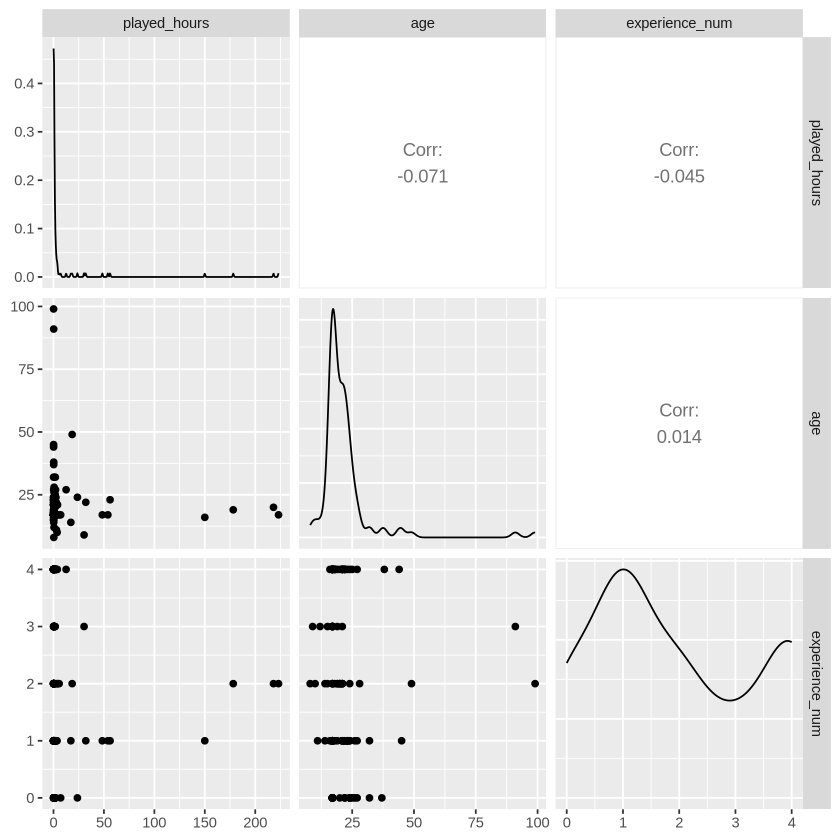

In [36]:
initial_plot <- ggpairs(players_numeric)
initial_plot

Shows correlation between played_hours, age and experience. Columns show correlation between different variables based on data.

Based on the initial plot, there seems to be very little correlation between played hours and age, as well as played hours and experience, and as such there seems to be a weak relationship between played hours and age as well as played hours and experience. That could mean potential other predictor variables have a higher rate of correlation, or that it is simply difficult to predict which players are going to have a higher or lower number of hours. This could be potentially remedied through using more predictable variables, which could be obtained from having more information, optional or required, asked of participants when originally signing up for the study as this could give more potential variables that would help in predicting which kinds of players are going to contribute greater amounts of data. 


In [37]:
data_split <- initial_split(players_numeric, prop = 0.75, strata = played_hours)
train_data <- training(data_split)
test_data <- testing(data_split)
#train_data <- train_data |>
#  mutate(log_played_hours = log(played_hours + 1)) #tried standardising 
#ggpairs(
#  train_data,
#  columns = c("log_played_hours", "age")
#)

Having large amounts of training data is necessary in order to give accurate predictions, and as such we used a 75% and 25% split in the data. It is always more valuable to have a higher training split than a testing split, as the more data used to train our model gives more accurate results. We must also take into account the best number of k values that we use, as depending on how many we choose to use we can cause either overfitting and underfitting, with the end results being that the predicted data is very inaccurate to what the values should be.

In [38]:
lm_spec <- linear_reg() |>
  set_engine("lm")
data_recipe <- recipe(played_hours ~ age +
                              experience_num, data = train_data)
print(lm_spec)
print(data_recipe)


Linear Regression Model Specification (regression)

Computational engine: lm 





── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



In [39]:
data_workflow <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(lm_spec) |>
  fit(data = train_data)
data_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
   (Intercept)             age  experience_num  
       17.6675         -0.2894         -1.0491  


In [40]:
data_predict <- data_workflow |>
predict(new_data = test_data) |>
bind_cols(test_data)
data_rmspe <- data_predict |>
  mutate(percentage_error = (.pred - played_hours) / played_hours) |>
  summarize(rmspe = sqrt(mean(percentage_error^2))) |>
  pull(rmspe)
data_rmspe


[1] 52.36383

In order to confirm the accuracy of the model we have created, calculating the root mean squared prediction error(RMSPE) is necessary. The values range depending on which values are used in the training set, so rerunning the code will get us different values for the RMSPE. A completely accurate prediction is practically impossible, and as such we are looking for training RMSE values which are as low as possible, as those have the lowest prediction error, which gives us more accurate predictions on which we can base the type of players giving the most data to the study.

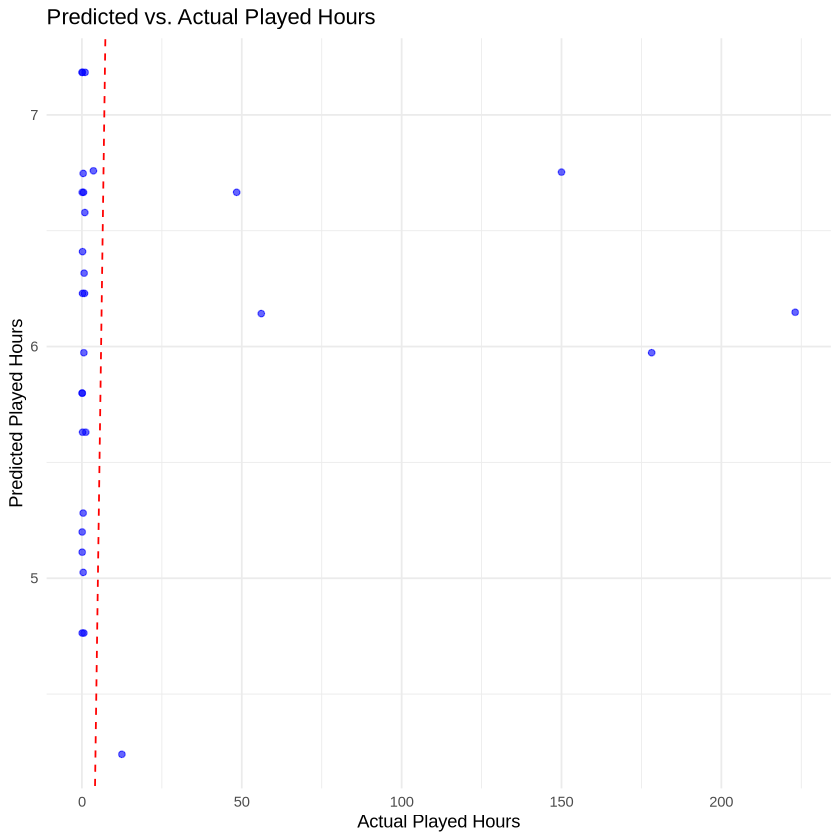

In [33]:
ggplot(data_predict, aes(x = played_hours, y = .pred)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(
    title = "Predicted vs. Actual Played Hours",
    x = "Actual Played Hours",
    y = "Predicted Played Hours"
  ) +
  theme_minimal()

While the current analysis provides a relationship between playtime, age and experience, there is potential to enhance the study by collecting additional variables that may better predict player engagement. For instance, data on in-game achievements, or device type could provide more granular insights into player behaviour. Addressing the observed skewness in playtime and ensuring a balanced representation of different age groups and experience levels in the dataset could reduce biases and improve model reliability. Since they make up a sizable section of the player population and are likely to provide useful data for modelling, future recruitment attempts should concentrate on younger players with intermediate experience levels. Lastly, as the dataset grows, protecting participant privacy and following moral data gathering guidelines will continue to be top priorities. 

Other factors could also be included to further narrow down the types of players likely to contribute large amounts of data, such as requesting more information such as grade level hobbies, etc. Naturally, this must be balanced with protection of player privacy, ensuring data and privacy integrity through not intrusive data gathering practices, such as optional information that can be included when signing up, but not necessary for providing data to the research study.
